In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
sns.set(rc={'figure.figsize':(20,10)})

In [3]:
df = pd.read_csv('/kaggle/input/daily-temperature-of-major-cities/city_temperature.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
zurich = df[(df.City == 'Zurich') & (df.Year > 2016) & (df.Year < 2020)]

In [5]:
zurich = zurich.groupby(['Year', 'Day', 'Month']).first().reset_index()

In [6]:
zurich['timeday'] = zurich.index

<AxesSubplot:xlabel='timeday', ylabel='AvgTemperature'>

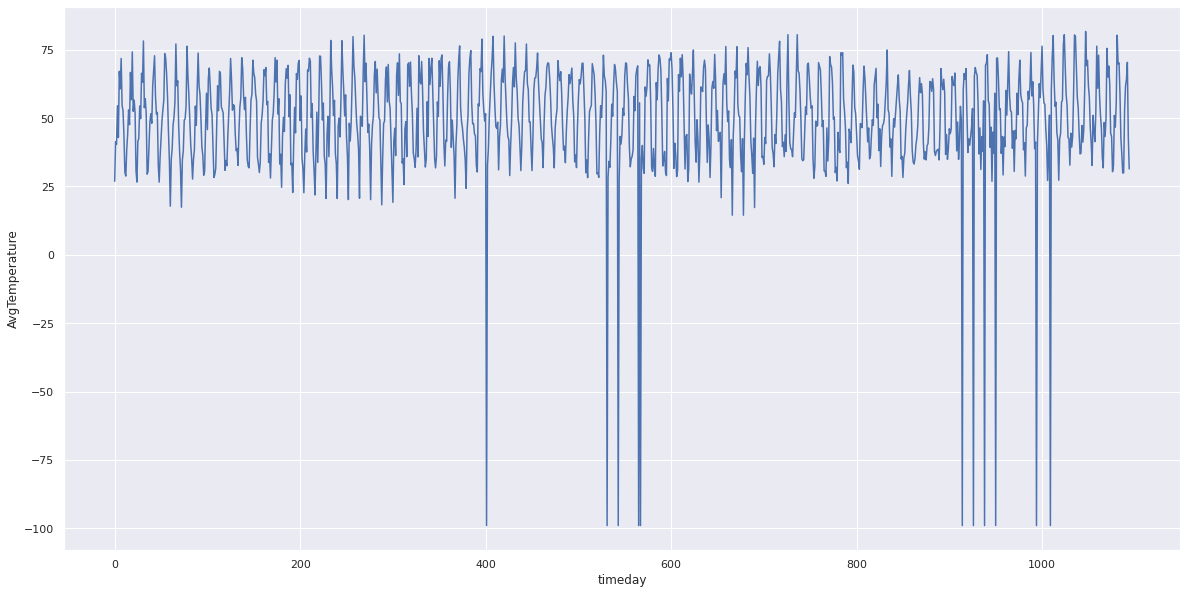

In [7]:
sns.lineplot(data = zurich, x = 'timeday', y = 'AvgTemperature')

In [8]:
from numpy import cos as cos

In [9]:
time = zurich.index.to_numpy().flatten()

In [10]:
time = zurich.index.to_numpy().flatten()
zurich['feature'] = cos(time * 2 * np.pi/365) 

In [11]:
zurich

,Year,Day,Month,Region,Country,State,City,AvgTemperature,timeday,feature
0,2017,1,1,Europe,Switzerland,None,Zurich,26.9,0,1.000000
1,2017,1,2,Europe,Switzerland,None,Zurich,41.4,1,0.999852
2,2017,1,3,Europe,Switzerland,None,Zurich,40.4,2,0.999407
3,2017,1,4,Europe,Switzerland,None,Zurich,54.5,3,0.998667
4,2017,1,5,Europe,Switzerland,None,Zurich,42.9,4,0.997630
...,...,...,...,...,...,...,...,...,...,...
1090,2019,31,5,Europe,Switzerland,None,Zurich,61.7,1090,0.996298
1091,2019,31,7,Europe,Switzerland,None,Zurich,64.1,1091,0.997630
1092,2019,31,8,Europe,Switzerland,None,Zurich,70.4,1092,0.998667
1093,2019,31,10,Europe,Switzerland,None,Zurich,43.3,1093,0.999407


In [12]:
reg = LinearRegression()
reg.fit(zurich['feature'].to_numpy().reshape(-1, 1), zurich['AvgTemperature'].to_numpy())

LinearRegression()

In [13]:
zurich['pred'] = reg.predict(zurich['feature'].to_numpy().reshape(-1, 1))

<AxesSubplot:xlabel='timeday', ylabel='AvgTemperature'>

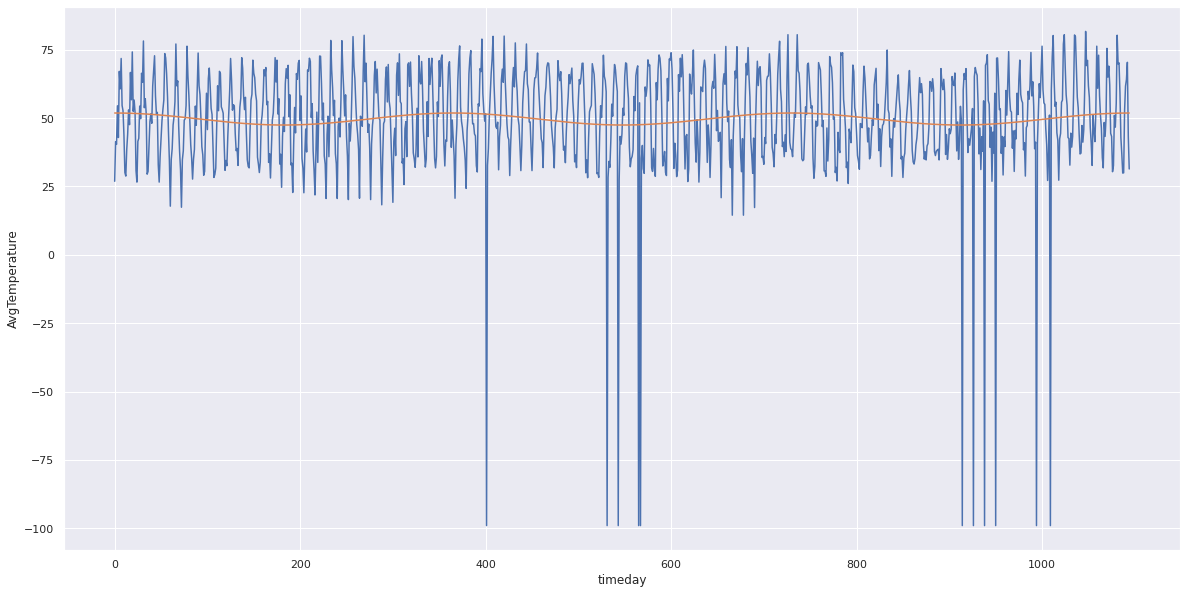

In [14]:
sns.lineplot(data = zurich, x = 'timeday', y = 'AvgTemperature')
sns.lineplot(data = zurich, x = 'timeday', y = 'pred')

In [15]:
zurich = df[(df.City == 'Zurich') & (df.Year == 2017)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

<AxesSubplot:xlabel='timeday', ylabel='AvgTemperature'>

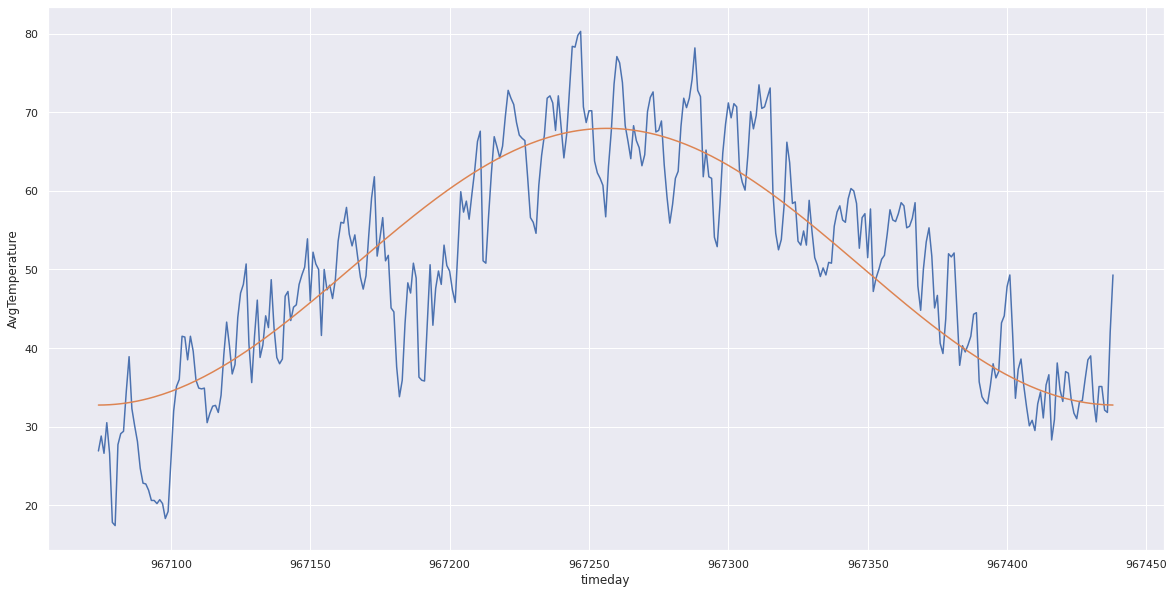

In [16]:
reg = LinearRegression()
time = zurich.reset_index().index.to_numpy().flatten()
zurich['timeday'] = zurich.index
zurich['feature'] = np.cos(time * 2 * np.pi/365) 
reg.fit(zurich['feature'].to_numpy().reshape(-1, 1), zurich['AvgTemperature'].to_numpy())
zurich['pred'] = reg.predict(zurich['feature'].to_numpy().reshape(-1, 1))
sns.lineplot(data = zurich, x = 'timeday', y = 'AvgTemperature')
sns.lineplot(data = zurich, x = 'timeday', y = 'pred')

In [17]:
reg.coef_

array([-17.60823944])

In [18]:
reg.intercept_

50.35068493150685

In [19]:
zurich

,Region,Country,State,City,Month,Day,Year,AvgTemperature,timeday,feature,pred
967074,Europe,Switzerland,NaN,Zurich,1,1,2017,26.9,967074,1.000000,32.742445
967075,Europe,Switzerland,NaN,Zurich,1,2,2017,28.8,967075,0.999852,32.745054
967076,Europe,Switzerland,NaN,Zurich,1,3,2017,26.6,967076,0.999407,32.752880
967077,Europe,Switzerland,NaN,Zurich,1,4,2017,30.5,967077,0.998667,32.765921
967078,Europe,Switzerland,NaN,Zurich,1,5,2017,26.6,967078,0.997630,32.784172
...,...,...,...,...,...,...,...,...,...,...,...
967434,Europe,Switzerland,NaN,Zurich,12,27,2017,35.1,967434,0.996298,32.807628
967435,Europe,Switzerland,NaN,Zurich,12,28,2017,32.1,967435,0.997630,32.784172
967436,Europe,Switzerland,NaN,Zurich,12,29,2017,31.8,967436,0.998667,32.765921
967437,Europe,Switzerland,NaN,Zurich,12,30,2017,42.0,967437,0.999407,32.752880


In [20]:
from scipy import signal

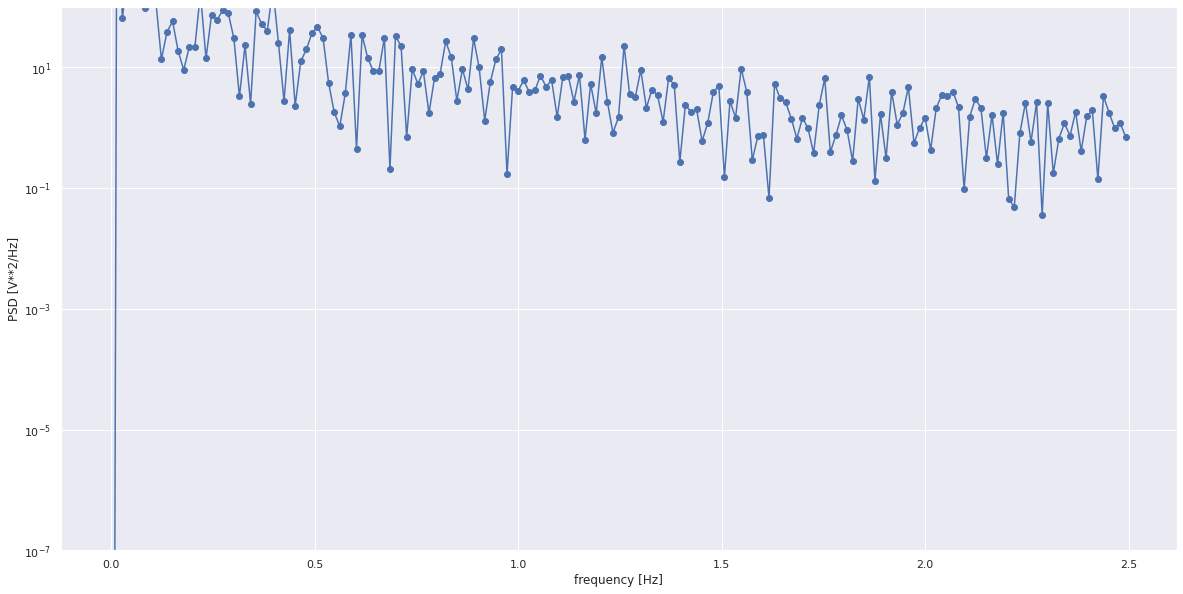

In [21]:
import matplotlib.pyplot as plt
f, Pxx_den = signal.periodogram(zurich['AvgTemperature'].to_numpy(), 5)
plt.semilogy(f, Pxx_den, marker='o')
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [22]:
Pxx_den.max()

11697.29144753725

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

<AxesSubplot:xlabel='timeday', ylabel='AvgTemperature'>

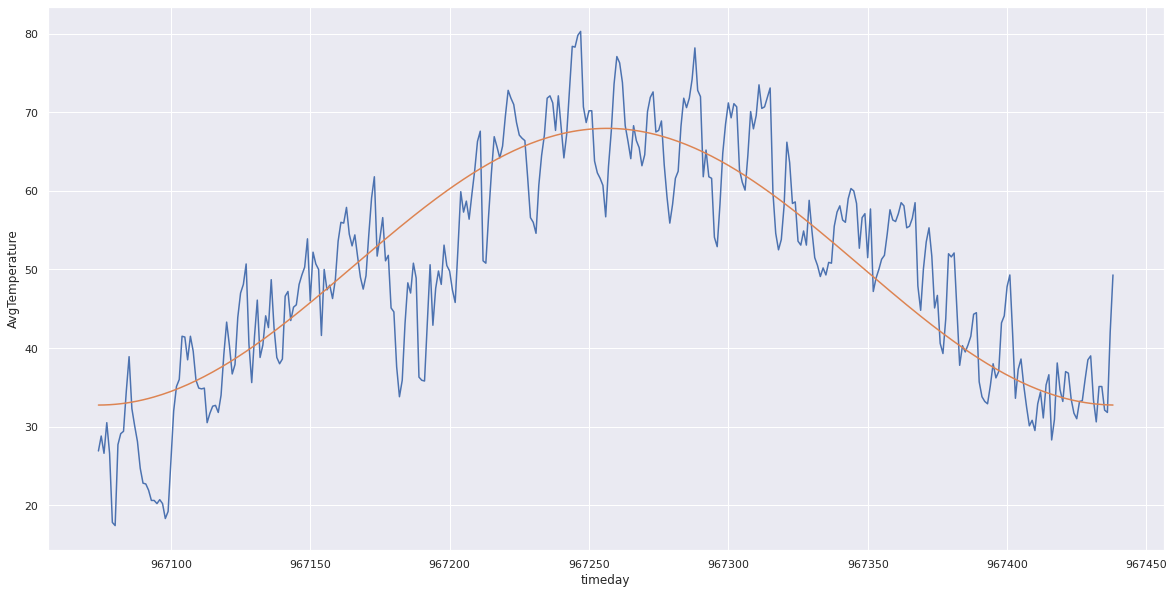

In [23]:
reg = LinearRegression()
time = zurich.reset_index().index.to_numpy().flatten()
zurich['timeday'] = zurich.index
zurich['feature1'] = np.cos(time * 2 * np.pi/365) 
zurich['feature2'] = np.cos(time * 2 * np.pi/365) 
reg.fit(zurich[['feature1', 'feature2']], zurich['AvgTemperature'].to_numpy())
zurich['pred'] = reg.predict(zurich[['feature1', 'feature2']].to_numpy())
sns.lineplot(data = zurich, x = 'timeday', y = 'AvgTemperature')
sns.lineplot(data = zurich, x = 'timeday', y = 'pred')

In [24]:
reg.coef_

array([-8.80411972, -8.80411972])